# IC 4.10 Create Visualizations 

# 1. Import libraries and data 

# 2. Data Security

# 3. Categorizing data by geographic regions  

# 4. Create Subset with high activity customers

# 5. Creating User Profiles

# 6. Visualizations 

# 7. Statistics on user profiles

# 8. Analyzing User Profiles by region and department 

# ---------------------------------------------------------------------------------------------------------------

# 1. Import libraries and data 

In [7]:
#Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
# Create string for the path 

path = r'C:\Users\kilia\OneDrive\CareerFoundry\Projects\Data Immersion Course\Achievement 4\Instacart Basket Analysis_04-2023\02 Data\Original Data'
path1 = r'C:\Users\kilia\OneDrive\CareerFoundry\Projects\Data Immersion Course\Achievement 4\Instacart Basket Analysis_04-2023'
visu_path = r'C:\Users\kilia\OneDrive\CareerFoundry\Projects\Data Immersion Course\Achievement 4\Instacart Basket Analysis_04-2023\04 Analysis\Visualizations'

In [9]:
# Import dataframe_combined dataset

df_combined = pd.read_pickle(os.path.join(path1,'02 Data', 'Prepared Data','dataframe_combined.pkl'))

In [10]:
# Check importet dataframe

df_combined.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequenzy_flag,first_name,last_name,gender,state,age,date_joined,number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [11]:
df_combined.shape

(32404859, 32)

# 2. Data Security

### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

#### I drop the 'first_name' and 'last_name' column due to security issues with personal data like names. 


In [12]:
# Drop columns

df_combined_privacy = df_combined.drop(['first_name' , 'last_name'], axis = 1, inplace = False)

In [13]:
# Check new dataframe 

df_combined_privacy.head(50)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,avg_days_since_last_order,mean_days_since_last_order,order_frequenzy_flag,gender,state,age,date_joined,number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,20.5,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,20.5,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,20.5,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,20.5,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,20.5,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [14]:
df_combined_privacy.shape

(32404859, 30)

# 3. Categorizing data by geographic regions   

### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

#### - Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
#### - Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [15]:
# Create list for every region 

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania']
Midwest = ['Ohio', 'Indiana', 'Illinois', 'Michigan', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Texas', 'Oklahoma']
West = ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'California', 'Oregon', 'Washington', 'Alaska', 'Hawaii']


In [16]:
# Check lists

Northeast

['Maine',
 'New Hampshire',
 'Vermont',
 'Massachusetts',
 'Rhode Island',
 'Connecticut',
 'New York',
 'New Jersey',
 'Pennsylvania']

In [17]:
Midwest

['Ohio',
 'Indiana',
 'Illinois',
 'Michigan',
 'Wisconsin',
 'Minnesota',
 'Iowa',
 'Missouri',
 'North Dakota',
 'South Dakota',
 'Nebraska',
 'Kansas']

In [18]:
South

['Delaware',
 'Maryland',
 'District of Columbia',
 'Virginia',
 'West Virginia',
 'North Carolina',
 'South Carolina',
 'Georgia',
 'Florida',
 'Kentucky',
 'Tennessee',
 'Alabama',
 'Mississippi',
 'Arkansas',
 'Louisiana',
 'Texas',
 'Oklahoma']

In [19]:
West

['Montana',
 'Idaho',
 'Wyoming',
 'Colorado',
 'New Mexico',
 'Arizona',
 'Utah',
 'Nevada',
 'California',
 'Oregon',
 'Washington',
 'Alaska',
 'Hawaii']

In [20]:
# Assign Northeast

df_combined_privacy.loc[df_combined_privacy['state'].isin(Northeast), 'region'] = 'Northeast'

In [21]:
# Assign Midwest

df_combined_privacy.loc[df_combined_privacy['state'].isin(Midwest), 'region'] = 'Midwest'

In [22]:
# Assign South 

df_combined_privacy.loc[df_combined_privacy['state'].isin(South), 'region'] = 'South'

In [23]:
# Assign West 

df_combined_privacy.loc[df_combined_privacy['state'].isin(West), 'region'] = 'West'

In [24]:
# Count values

check_assign = df_combined_privacy['region'].value_counts()

In [25]:
# Check region column 

check_assign.sum()

32404859

In [26]:
# Check spending habit by regions 

spending_by_region = df_combined_privacy.groupby('region')['spending_flag'].value_counts()

In [27]:
spending_by_region = pd.crosstab(df_combined_privacy['region'],df_combined_privacy['spending_flag'],dropna = False)

In [28]:
spending_by_region

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


# 4. Create Subset with high activity customers

### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [29]:
# Create low_order_customer flag column 

df_combined_privacy.loc[df_combined_privacy['max_order'] < 5, 'low_order_customer'] = 'True'

In [30]:
df_combined_privacy.loc[df_combined_privacy['max_order'] >= 5, 'low_order_customer'] = 'False'

In [31]:
# Count values 

df_combined_privacy['low_order_customer'].value_counts()

False    30964564
True      1440295
Name: low_order_customer, dtype: int64

In [32]:
# Create Subset 

df_high_order_customers = df_combined_privacy[df_combined_privacy['low_order_customer'] == 'False']

In [33]:
# Check subset

df_high_order_customers.shape

(30964564, 32)

In [34]:
# Export Subset 

df_high_order_customers.to_pickle(os.path.join(path1,'02 Data', 'Prepared Data','high_activity_customers.pkl'))

# 5. Creating User Profiles

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#
**Age Profile:** 

Young < 25 

Middle Age >=25 & <60

Senior >=60

**Income Profile:**

Low Income <35000 

Mid-Income >=35000 & <10000

High-Income >=100000

**Department Profiles:**

Vegan = department_id != 12 & != 16

Vegetarian = department_id != 12

Meat-Consumer = department_id 12


**Family Profile:** 

single  = number_dependants == 0 

family = number_dependants >= 1

In [35]:
# Age profile

age_profile = []

for row in df_combined_privacy['age'].tolist():
    if row <= 25:
        age_profile.append('Young')
    elif row > 25 and row < 60:
        age_profile.append('Middle-age')
    elif row >= 60:
        age_profile.append('Senior')
    else:
        print('error')

In [36]:
df_combined_privacy['age_profile'] = age_profile

In [37]:
# Check data 

df_combined_privacy['age_profile'].value_counts()

Middle-age    17292415
Senior        11067255
Young          4045189
Name: age_profile, dtype: int64

In [38]:
# Income profile

income_profile = []

for row in df_combined_privacy['income'].tolist():
    if row < 35000:
        income_profile.append('Low-income')
    elif row >= 35000 and row < 100000:
        income_profile.append('Mid-income')
    elif row >= 100000:
        income_profile.append('High-income')
    else:
        print('error')

In [39]:
df_combined_privacy['income_profile'] = income_profile

In [40]:
# Check data 

df_combined_privacy['income_profile'].value_counts()

Mid-income     16629381
High-income    14814766
Low-income       960712
Name: income_profile, dtype: int64

In [41]:
# Department crosstab
department_crosstab = pd.crosstab(df_combined_privacy['department_id'], df_combined_privacy['user_id'], dropna = False)

In [42]:
# Assign department profile to users and store it in a dictionary
department_dict = dict()
for user in department_crosstab:
    workinglist = department_crosstab[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:
        department_dict[user] = 'Vegan'
    elif workinglist[11] == 0:
        department_dict[user] = 'Vegetarian'
    elif workinglist[11] >= 1 :
        department_dict[user] = 'Meat-Consumer'
    else:
        print('NaN')

In [43]:
# assigning department profile to the list

department_list = []
for user in df_combined_privacy['user_id']:
    department_list.append(department_dict[user])

In [44]:
# create nutrition profile column

df_combined_privacy['nutrition_profile'] = department_list

In [45]:
# check nutrition profile column

df_combined_privacy['nutrition_profile'].value_counts()

Meat-Consumer    23762619
Vegetarian        8258813
Vegan              383427
Name: nutrition_profile, dtype: int64

In [46]:
# Family profile

df_combined_privacy.loc[df_combined_privacy['number_dependants'] == 0, 'family_profile'] = 'single'

In [47]:
df_combined_privacy.loc[df_combined_privacy['number_dependants'] >= 1, 'family_profile'] = 'family'

In [48]:
# Check family profile column 

df_combined_privacy['family_profile'].value_counts()

family    24307356
single     8097503
Name: family_profile, dtype: int64

In [49]:
df_combined_privacy.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_dependants,family_status,income,region,low_order_customer,age_profile,income_profile,nutrition_profile,family_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family


# 6. Visualizations 

### 6. Create an appropriate visualization to show the distribution of profiles.

In [50]:
# Create df for visualisations of profiles

df_profiles = df_combined_privacy[['user_id', 'age_profile', 'income_profile', 'family_profile', 'nutrition_profile', 'low_order_customer' , 'region', 'family_status', 'loyalty_flag', 'spending_flag', 'gender', 'order_frequenzy_flag']]

In [51]:
df_profiles.head(50)

,user_id,age_profile,income_profile,family_profile,nutrition_profile,low_order_customer,region,family_status,loyalty_flag,spending_flag,gender,order_frequenzy_flag
0,1,Middle-age,Mid-income,family,Vegetarian,False,South,married,New customer,Low spender,Female,Non-frequent customer
1,1,Middle-age,Mid-income,family,Vegetarian,False,South,married,New customer,Low spender,Female,Non-frequent customer
2,1,Middle-age,Mid-income,family,Vegetarian,False,South,married,New customer,Low spender,Female,Non-frequent customer
3,1,Middle-age,Mid-income,family,Vegetarian,False,South,married,New customer,Low spender,Female,Non-frequent customer
4,1,Middle-age,Mid-income,family,Vegetarian,False,South,married,New customer,Low spender,Female,Non-frequent customer
5,1,Middle-age,Mid-income,family,Vegetarian,False,South,married,New customer,Low spender,Female,Non-frequent customer
6,1,Middle-age,Mid-income,family,Vegetarian,False,South,married,New customer,Low spender,Female,Non-frequent customer
7,1,Middle-age,Mid-income,family,Vegetarian,False,South,married,New customer,Low spender,Female,Non-frequent customer
8,1,Middle-age,Mid-income,family,Vegetarian,False,South,married,New customer,Low spender,Female,Non-frequent customer
9,1,Middle-age,Mid-income,family,Vegetarian,False,South,married,New customer,Low spender,Female,Non-frequent customer


In [52]:
df_user_profiles = df_profiles.groupby('user_id').first()

In [53]:
df_user_profiles.head(20)

,age_profile,income_profile,family_profile,nutrition_profile,low_order_customer,region,family_status,loyalty_flag,spending_flag,gender,order_frequenzy_flag
user_id,,,,,,,,,,,
1,Middle-age,Mid-income,family,Vegetarian,False,South,married,New customer,Low spender,Female,Non-frequent customer
2,Senior,Mid-income,family,Meat-Consumer,False,West,married,Regular customer,Low spender,Female,Regular customer
3,Middle-age,Mid-income,family,Vegetarian,False,West,married,Regular customer,Low spender,Female,Frequent customer
4,Middle-age,Mid-income,family,Vegan,False,South,married,New customer,Low spender,Male,Regular customer
5,Senior,High-income,single,Vegetarian,True,West,divorced/widowed,New customer,Low spender,Female,Regular customer
6,Middle-age,High-income,family,Meat-Consumer,True,West,married,New customer,Low spender,Female,Frequent customer
7,Middle-age,Mid-income,family,Meat-Consumer,False,Northeast,married,Regular customer,Low spender,Male,Frequent customer
8,Middle-age,Mid-income,family,Vegetarian,True,South,married,New customer,Low spender,Female,Non-frequent customer
9,Senior,High-income,family,Meat-Consumer,True,South,married,New customer,Low spender,Male,Non-frequent customer


In [54]:
# Create color list

color_list_blue_3 = ('royalblue', 'cornflowerblue', 'lightsteelblue')

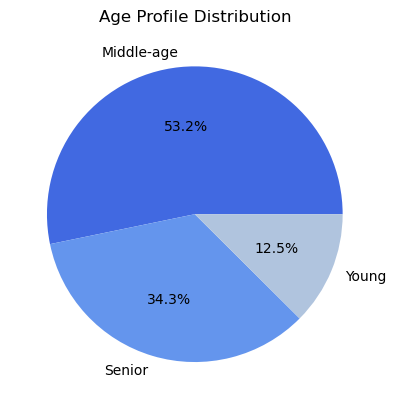

In [55]:
# Age profile visualization + Export

plt.pie(df_user_profiles['age_profile'].value_counts(), autopct='%1.1f%%', labels = df_user_profiles['age_profile'].unique(), colors = color_list_blue_3)
plt.title("Age Profile Distribution")
plt.savefig(os.path.join(visu_path, 'pie_age_profiles.png'))

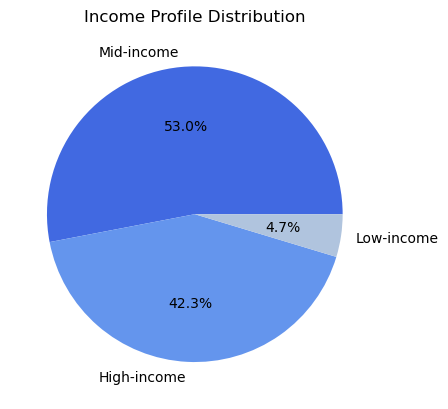

In [56]:
# Income profile visualization + export 

plt.pie(df_user_profiles['income_profile'].value_counts(), autopct='%1.1f%%', labels = df_user_profiles['income_profile'].unique(), colors = color_list_blue_3)
plt.title("Income Profile Distribution")
plt.savefig(os.path.join(visu_path, 'pie_income_profiles.png'))

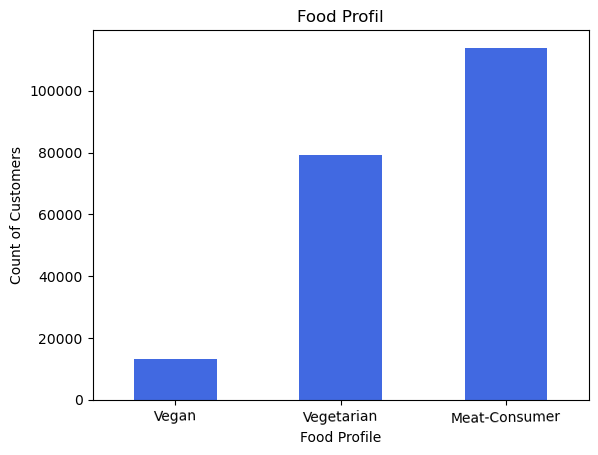

In [170]:
# Department profile visualization + export 
df_user_profiles['nutrition_profile'].value_counts().sort_values(ascending = True).plot.bar(rot=1, color = ['royalblue'])
plt.title('Food Profil')
plt.xlabel('Food Profile')
plt.ylabel('Count of Customers')
plt.savefig(os.path.join(visu_path, 'Hbar_department_profiles.png'),bbox_inches='tight', pad_inches=0.1)

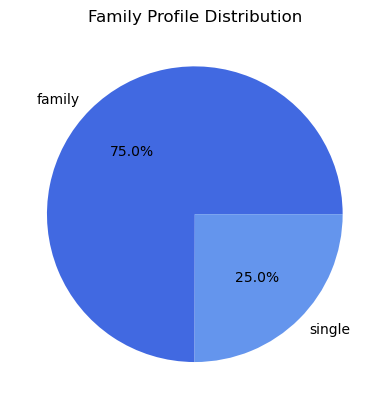

In [58]:
# Family profile visualization + export 

plt.pie(df_user_profiles['family_profile'].value_counts(), autopct='%1.1f%%', labels = df_user_profiles['family_profile'].unique(), colors = ['royalblue', 'cornflowerblue'])
plt.title("Family Profile Distribution")
plt.savefig(os.path.join(visu_path, 'pie_family_profiles.png'))

# 7. Statistics on user profiles

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [186]:
# Age profile statistics

df_combined_privacy.groupby('age_profile').agg({'prices': ['mean', 'max', 'min'], 'days_since_last_order': ['mean', 'max', 'min']})

prices            days_since_last_order           
                 mean   max  min                  mean   max  min
age_profile                                                      
Middle-age   7.789458  25.0  1.0             11.114039  30.0  0.0
Senior       7.795312  25.0  1.0             11.092552  30.0  0.0
Young        7.785748  25.0  1.0             11.093030  30.0  0.0

In [187]:
# Income profile statistics

df_combined_privacy.groupby('income_profile').agg({'prices': ['mean', 'max', 'min'], 'days_since_last_order': ['mean', 'max', 'min']})

prices            days_since_last_order           
                    mean   max  min                  mean   max  min
income_profile                                                      
High-income     7.959256  25.0  1.0             11.039852  30.0  0.0
Low-income      6.492908  25.0  1.0             11.756873  30.0  0.0
Mid-income      7.716134  25.0  1.0             11.124092  30.0  0.0

In [188]:
# Department profile statistics

df_combined_privacy.groupby('nutrition_profile').agg({'prices': ['mean', 'max', 'min'], 'days_since_last_order': ['mean', 'max', 'min']})

prices            days_since_last_order           
                       mean   max  min                  mean   max  min
nutrition_profile                                                      
Meat-Consumer      7.905951  25.0  1.0             10.762605  30.0  0.0
Vegan              7.009920  20.0  1.0             14.749275  30.0  0.0
Vegetarian         7.496501  20.0  1.0             11.952600  30.0  0.0

In [189]:
# Family profile statistics

df_combined_privacy.groupby('family_profile').agg({'prices': ['mean', 'max', 'min'], 'days_since_last_order': ['mean', 'max', 'min']})

prices            days_since_last_order           
                    mean   max  min                  mean   max  min
family_profile                                                      
family          7.791334  25.0  1.0             11.111834  30.0  0.0
single          7.789975  25.0  1.0             11.080805  30.0  0.0

# 8. Analyzing User Profiles by region and department 

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [63]:
df_combined_privacy.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_dependants,family_status,income,region,low_order_customer,age_profile,income_profile,nutrition_profile,family_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,False,Middle-age,Mid-income,Vegetarian,family


In [64]:
# Crosstab for Region/Age_profile 

ct_region_age = pd.crosstab(df_user_profiles['region'], df_user_profiles['age_profile'], dropna = False)

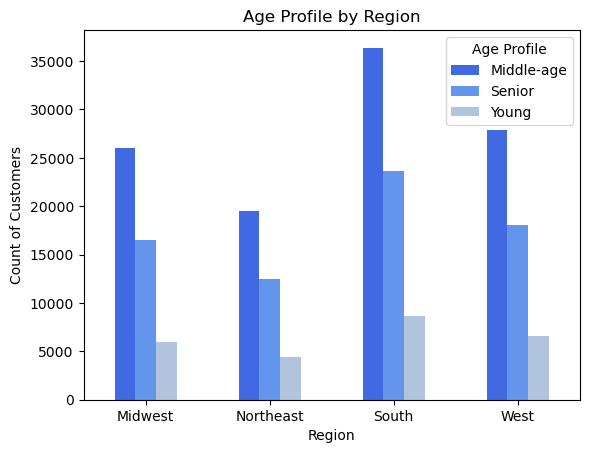

In [169]:
# Region/Age_profile  visualization + export 

ct_region_age.plot.bar(rot = 0, color = color_list_blue_3)
plt.title('Age Profile by Region')
plt.xlabel('Region')
plt.ylabel('Count of Customers')
plt.legend(title = 'Age Profile')
plt.savefig(os.path.join(visu_path, 'bar_age_region.png'),bbox_inches='tight', pad_inches=0.1)

In [66]:
# Crosstab for Region/Income_profile 

ct_region_income = pd.crosstab(df_user_profiles['region'], df_user_profiles['income_profile'], dropna = False)

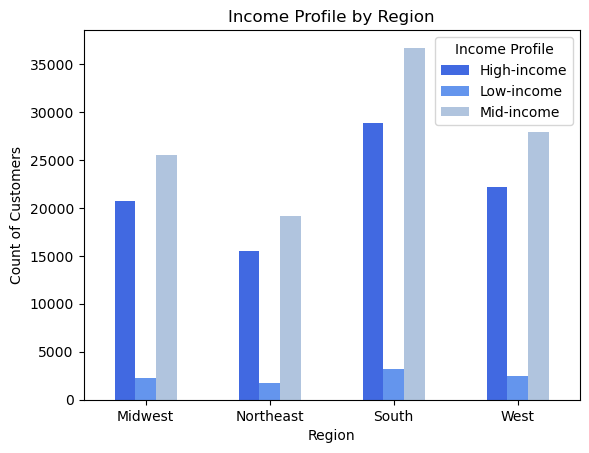

In [168]:
# Region/Income_profile visualization + export 

ct_region_income.plot.bar(rot = 0, color = color_list_blue_3)
plt.title('Income Profile by Region')
plt.xlabel('Region')
plt.ylabel('Count of Customers')
plt.legend(title = 'Income Profile')
plt.savefig(os.path.join(visu_path, 'bar_income_region.png'),bbox_inches='tight', pad_inches=0.1)

In [68]:
# Crosstab for Region/Nutrition_profile 
ct_region_department = pd.crosstab(df_user_profiles['region'], df_user_profiles['nutrition_profile'], dropna = False)

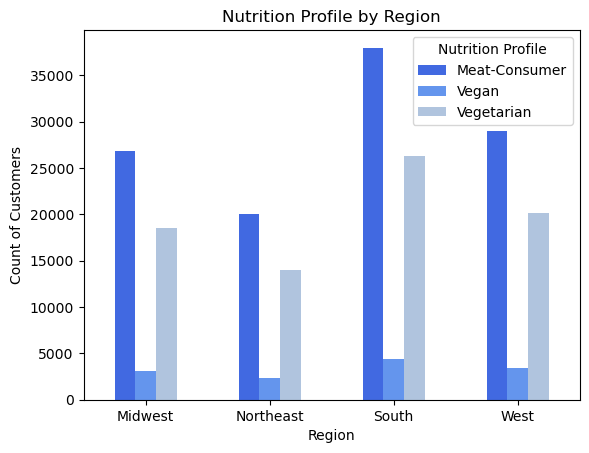

In [167]:
# Region/Nutrition_profile visualization + export 

ct_region_department.plot.bar(rot = 0, color = color_list_blue_3)
plt.title('Nutrition Profile by Region')
plt.xlabel('Region')
plt.ylabel('Count of Customers')
plt.legend(title = 'Nutrition Profile')
plt.savefig(os.path.join(visu_path, 'bar_department_region.png'),bbox_inches='tight', pad_inches=0.1)

In [70]:
# Crosstab for Region/family_profile 
ct_region_family = pd.crosstab(df_user_profiles['region'], df_user_profiles['family_profile'], dropna = False)

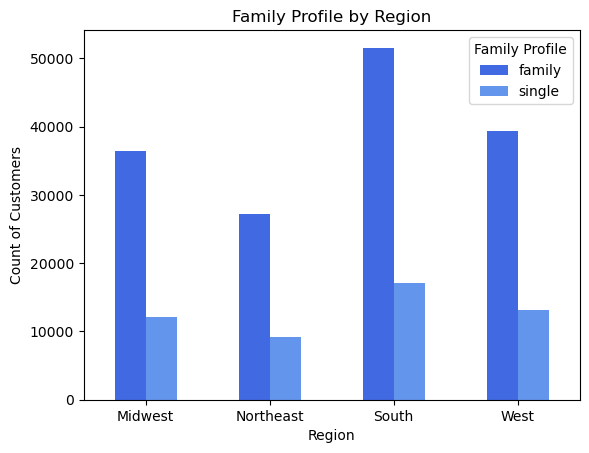

In [166]:
# Region/Income_profile visualization + export 

ct_region_family.plot.bar(rot = 0, color = color_list_blue_3)
plt.title('Family Profile by Region')
plt.xlabel('Region')
plt.ylabel('Count of Customers')
plt.legend(title = 'Family Profile')
plt.savefig(os.path.join(visu_path, 'bar_family_region.png'),bbox_inches='tight', pad_inches=0.1)

In [74]:
# Crosstab for Region/family_profile 

ct_department_user = pd.crosstab(df_combined_privacy['department_id'], df_combined_privacy['region'], dropna = False)

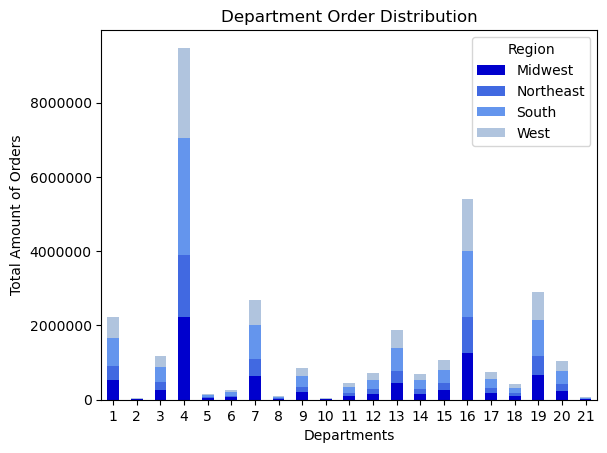

In [164]:
# Department order distribution visualization + export 

ct_department_user.plot.bar(stacked = True, rot = 0, color = ('mediumblue' ,'royalblue', 'cornflowerblue', 'lightsteelblue'))
plt.title('Department Order Distribution')
plt.xlabel('Departments')
plt.ylabel('Total Amount of Orders')
plt.legend(title = 'Region')
plt.ticklabel_format(style = 'plain', axis= 'y')
plt.savefig(os.path.join(visu_path, 'bar_department_distribution.png'),bbox_inches='tight', pad_inches=0.1)

In [148]:
# Crosstab for Region/family_profile 

ct_department_loyalty = pd.crosstab(df_combined_privacy['department_id'], df_combined_privacy['loyalty_flag'], dropna = False)

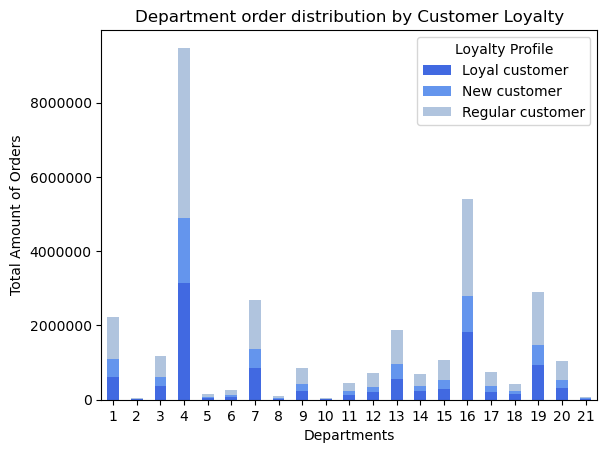

In [151]:
# Department order distribution by loyalty visualization + export 

ct_department_loyalty.plot.bar(stacked = True, rot = 0, color = (color_list_blue_3))
plt.title('Department order distribution by Customer Loyalty')
plt.xlabel('Departments')
plt.ylabel('Total Amount of Orders')
plt.legend(title = 'Loyalty Profile')
plt.ticklabel_format(style = 'plain', axis= 'y')
plt.savefig(os.path.join(visu_path, 'stackedbar_department_loyalty.png'), bbox_inches='tight', pad_inches=0.1)

In [90]:
# Crosstab for Region/loyalty_profile

ct_region_loyalty = pd.crosstab(df_combined_privacy['region'], df_combined_privacy['loyalty_flag'], dropna = False)

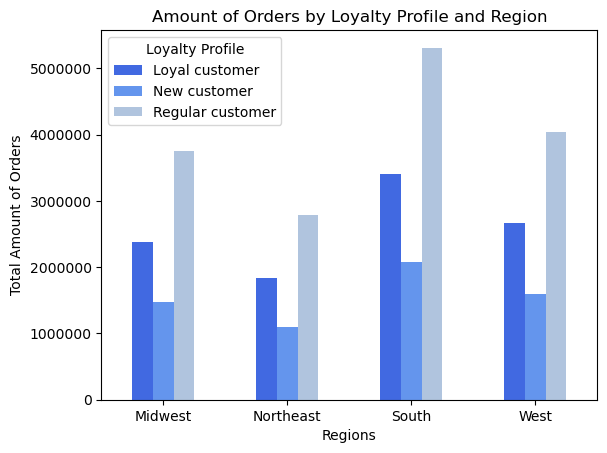

In [152]:
# Order habits by region and loyalty profil + export 

ct_region_loyalty.plot.bar(rot = 0, color = (color_list_blue_3))
plt.title('Amount of Orders by Loyalty Profile and Region')
plt.xlabel('Regions')
plt.ylabel('Total Amount of Orders')
plt.legend(title = 'Loyalty Profile')
plt.ticklabel_format(style = 'plain', axis= 'y')
plt.savefig(os.path.join(visu_path, 'bar_region_loyalty.png'),bbox_inches='tight', pad_inches=0.1)

In [103]:
# Crosstab for Age/order_frequency

ct_age_frequency = pd.crosstab(df_combined_privacy['age_profile'], df_combined_privacy['order_frequenzy_flag'], dropna = False)

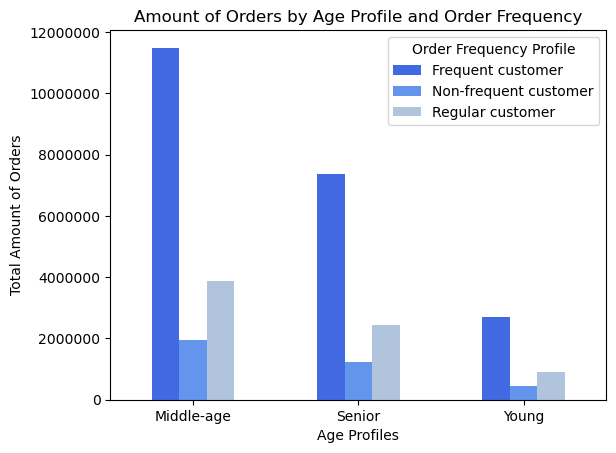

In [153]:
# Order habits by age profile and order frequency + export 

ct_age_frequency.plot.bar(rot = 0, color = (color_list_blue_3))
plt.title('Amount of Orders by Age Profile and Order Frequency')
plt.xlabel('Age Profiles')
plt.ylabel('Total Amount of Orders')
plt.legend(title = 'Order Frequency Profile')
plt.ticklabel_format(style = 'plain', axis= 'y')
plt.savefig(os.path.join(visu_path, 'bar_age_frequency.png'),bbox_inches='tight', pad_inches=0.1)

In [105]:
# Crosstab for family_status/order_frequency

ct_family_frequency = pd.crosstab(df_combined_privacy['family_status'], df_combined_privacy['order_frequenzy_flag'], dropna = False)

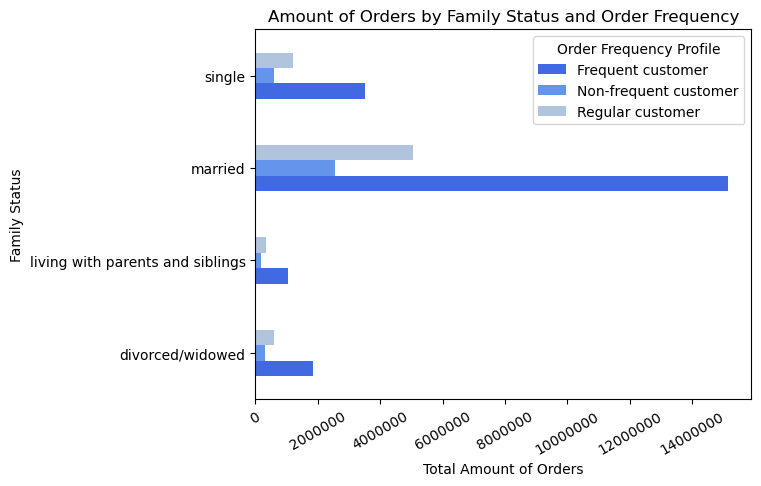

In [171]:
# Order habits by family status and order frequency + export 

ct_family_frequency.plot.barh(rot = 0, color = (color_list_blue_3))
plt.title('Amount of Orders by Family Status and Order Frequency')
plt.xlabel('Total Amount of Orders')
plt.ylabel('Family Status')
plt.legend(title = 'Order Frequency Profile')
plt.ticklabel_format(style = 'plain', axis= 'x')
plt.xticks(rotation=30)
plt.savefig(os.path.join(visu_path,'bar_family_frequency.png'),bbox_inches='tight', pad_inches=0.1)

In [176]:
# Crosstab for Age/department_id

ct_age_department = pd.crosstab(df_combined_privacy['department_id'], df_combined_privacy['age_profile'], dropna = False)

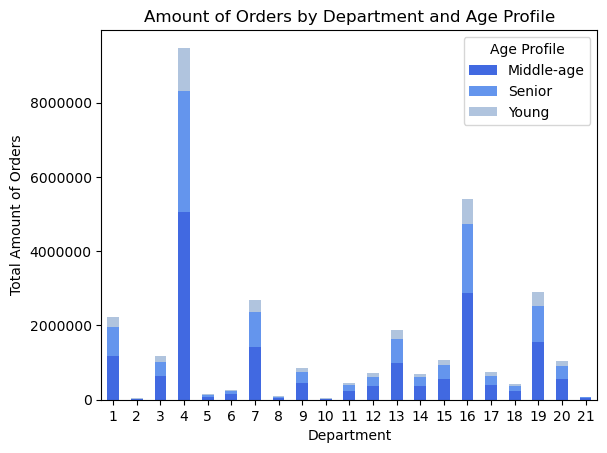

In [180]:
# Order habits by age and department_id + export 

ct_age_department.plot.bar(stacked = True, rot = 0, color = (color_list_blue_3))
plt.title('Amount of Orders by Department and Age Profile')
plt.xlabel('Department')
plt.ylabel('Total Amount of Orders')
plt.legend(title = 'Age Profile')
plt.ticklabel_format(style = 'plain', axis= 'y')
plt.savefig(os.path.join(visu_path,'stackedbar_age_department.png'),bbox_inches='tight', pad_inches=0.1)

In [178]:
# Crosstab for family status/department_id

ct_family_department = pd.crosstab(df_combined_privacy['department_id'], df_combined_privacy['family_status'], dropna = False)

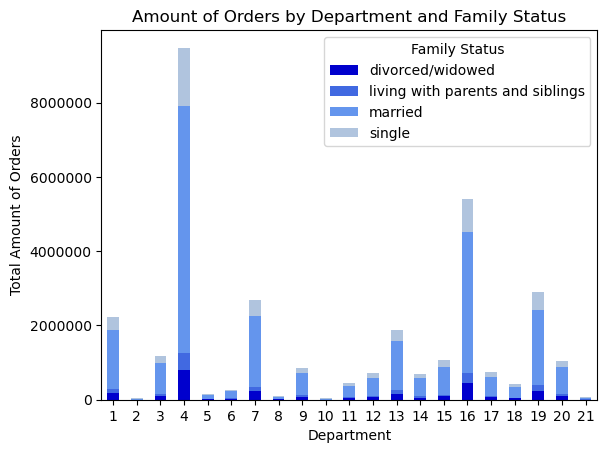

In [183]:
# Order habits by family status and department_id + export 

ct_family_department.plot.bar(stacked = True, rot = 0, color = ('mediumblue' ,'royalblue', 'cornflowerblue', 'lightsteelblue'))
plt.title('Amount of Orders by Department and Family Status')
plt.xlabel('Department')
plt.ylabel('Total Amount of Orders')
plt.legend(title = 'Family Status')
plt.ticklabel_format(style = 'plain', axis= 'y')
plt.savefig(os.path.join(visu_path,'stackedbar_family_department.png'),bbox_inches='tight', pad_inches=0.1)

In [190]:
# Crosstab for income-profile/loyalty_profile

ct_income_loyalty = pd.crosstab(df_combined_privacy['income_profile'], df_combined_privacy['loyalty_flag'], dropna = False)

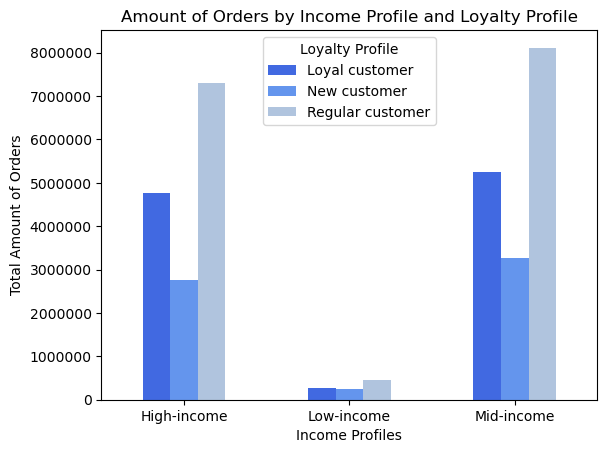

In [192]:
# Order habits by income profile and loyalty profile + export 

ct_income_loyalty.plot.bar(rot = 0, color = (color_list_blue_3))
plt.title('Amount of Orders by Income Profile and Loyalty Profile')
plt.xlabel('Income Profiles')
plt.ylabel('Total Amount of Orders')
plt.legend(title = 'Loyalty Profile')
plt.ticklabel_format(style = 'plain', axis= 'y')
plt.savefig(os.path.join(visu_path, 'bar_income_loyalty.png'),bbox_inches='tight', pad_inches=0.1)

In [193]:
# Export final dataset

df_combined_privacy.to_pickle(os.path.join(path1,'02 Data', 'Prepared Data','final_dataframe_combined.pkl'))